Links:
* [How to Use Word Embedding Layers for Deep Learning with Keras](https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/)
* [What Are Word Embeddings for Text?](https://machinelearningmastery.com/what-are-word-embeddings/)
* [How to Develop a Word Embedding Model for Predicting Movie Review Sentiment
](https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/)
* [Embed, encode, attend, predict: The new deep learning formula for state-of-the-art NLP models](https://explosion.ai/blog/deep-learning-formula-nlp)
* [How to Develop Word Embeddings in Python with Gensim](https://machinelearningmastery.com/develop-word-embeddings-python-gensim/)

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.layers import Input, Dense, Embedding, Flatten, Dropout
from keras.models import Model, Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score
import seaborn as sn
from time import time
import os
import encoders
import models
%matplotlib inline

In [28]:
# Dataset
categories = ['Democrat', 'Republican']
tweetsdf = pd.read_csv('democratvsrepublicantweets/ExtractedTweets.csv')
handlesdf = pd.read_csv('democratvsrepublicantweets/TwitterHandles.csv')
raw_tweets = tweetsdf['Tweet']
normalized_tweets = raw_tweets.str.upper()
char_to_int, int_to_char = encoders.create_encoder_decoder(normalized_tweets.str.cat())
parties = tweetsdf['Party']
y = 1.0 - np.asarray(parties == 'Democrat')
max_tweet_len = normalized_tweets.str.len().max()
X = encoders.encode_strings(normalized_tweets, char_to_int, max_tweet_len)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
filepath, model = models.model5(len(char_to_int) + 1, max_tweet_len)
if filepath in os.listdir():
    model.load_weights(filepath)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 166)               0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 166, 256)          134656    
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 163, 64)           65600     
_________________________________________________________________
dropout_10 (Dropout)         (None, 163, 64)           0         
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 81, 64)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 78, 32)            8224      
_________________________________________________________________
dropout_11 (Dropout)         (None, 78, 32)            0         
__________

In [ ]:
#TODO - Train this on a GPU
models.train(X_train, y_train, model, filepath)

Epoch 1/100
69168/69168 [==============================] - 83s 1ms/step - loss: 0.6911

Epoch 00001: loss improved from inf to 0.69107, saving model to model5-weights.hdf5
Epoch 2/100
16000/69168 [=====>........................] - ETA: 1:03 - loss: 0.6910

In [22]:
predictions = np.argmax(model.predict(X_test), axis=1)

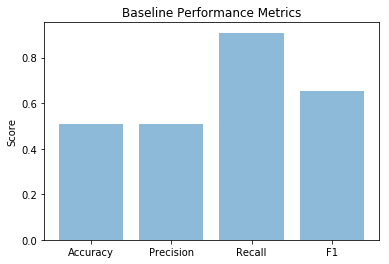

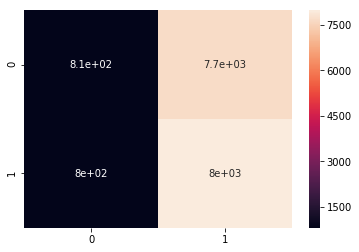

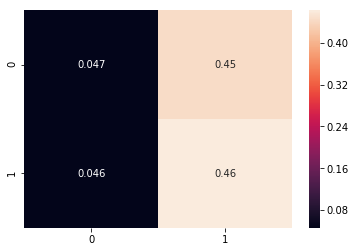

In [26]:
(accuracy, precision, recall, f1), confusion_matrix = models.plot_results(y_test, predictions)